In [2]:
from ema_workbench import RealParameter, ScalarOutcome, Constant, Model
from dps_lake_model import lake_model

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
model = Model("lakeproblem", function=lake_model)

# specify uncertainties
model.uncertainties = [
    RealParameter("b", 0.1, 0.45),
    RealParameter("q", 2.0, 4.5),
    RealParameter("mean", 0.01, 0.05),
    RealParameter("stdev", 0.001, 0.005),
    RealParameter("delta", 0.93, 0.99),
]

# set levers
model.levers = [
    RealParameter("c1", -2, 2),
    RealParameter("c2", -2, 2),
    RealParameter("r1", 0, 2),
    RealParameter("r2", 0, 2),
    RealParameter("w1", 0, 1),
]

# specify outcomes
model.outcomes = [
    ScalarOutcome("max_P"),
    ScalarOutcome("utility"),
    ScalarOutcome("inertia"),
    ScalarOutcome("reliability"),
]

# override some of the defaults of the model
model.constants = [
    Constant("alpha", 0.41),
    Constant("nsamples", 150),
    Constant("myears", 100),
]

In [4]:
from ema_workbench import MultiprocessingEvaluator, ema_logging, perform_experiments

ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model, n_processes=7) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=5)

[MainProcess/INFO] pool started with 7 workers
[MainProcess/INFO] performing 1000 scenarios * 5 policies * 1 model(s) = 5000 experiments
100%|█████████████████████████████████████| 5000/5000 [00:49<00:00, 100.58it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [9]:
outcomes['max_P']

array([11.00563968,  4.25724435,  5.9651976 , ...,  3.48851403,
        4.03564951,  0.31103647])

In [9]:
experiments['policy']

0       0
1       0
2       0
3       0
4       0
       ..
4995    4
4996    4
4997    4
4998    4
4999    4
Name: policy, Length: 5000, dtype: object

In [11]:
experiments

,b,delta,mean,q,stdev,c1,c2,r1,r2,w1,scenario,policy,model
0,0.102516,0.970385,0.028786,3.064633,0.004439,1.711834,1.746327,1.644945,1.289526,0.306905,5,0,lakeproblem
1,0.252497,0.972462,0.011223,2.262473,0.001552,1.711834,1.746327,1.644945,1.289526,0.306905,6,0,lakeproblem
2,0.189134,0.940739,0.032770,2.994989,0.003380,1.711834,1.746327,1.644945,1.289526,0.306905,7,0,lakeproblem
3,0.105293,0.949208,0.015703,2.148477,0.004634,1.711834,1.746327,1.644945,1.289526,0.306905,8,0,lakeproblem
4,0.210301,0.947296,0.047301,3.432014,0.004179,1.711834,1.746327,1.644945,1.289526,0.306905,9,0,lakeproblem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.109259,0.931980,0.014501,4.224583,0.001842,-1.732857,-0.893348,1.357879,0.419287,0.185507,1000,4,lakeproblem
4996,0.348070,0.969510,0.029543,3.112201,0.002830,-1.732857,-0.893348,1.357879,0.419287,0.185507,1001,4,lakeproblem
4997,0.321662,0.953748,0.034398,3.496119,0.003073,-1.732857,-0.893348,1.357879,0.419287,0.185507,1002,4,lakeproblem
4998,0.276635,0.968688,0.030153,3.051787,0.003811,-1.732857,-0.893348,1.357879,0.419287,0.185507,1003,4,lakeproblem


In [12]:
outcomes.keys()

dict_keys(['max_P', 'utility', 'inertia', 'reliability'])

/home/pfoytik/anaconda3/lib/python3.7/site-packages/ema_workbench/analysis/prim.py:31: ImportWarning: altair based interactive inspection not available
  ("altair based interactive " "inspection not available"), ImportWarning
[MainProcess/INFO] no time dimension found in results


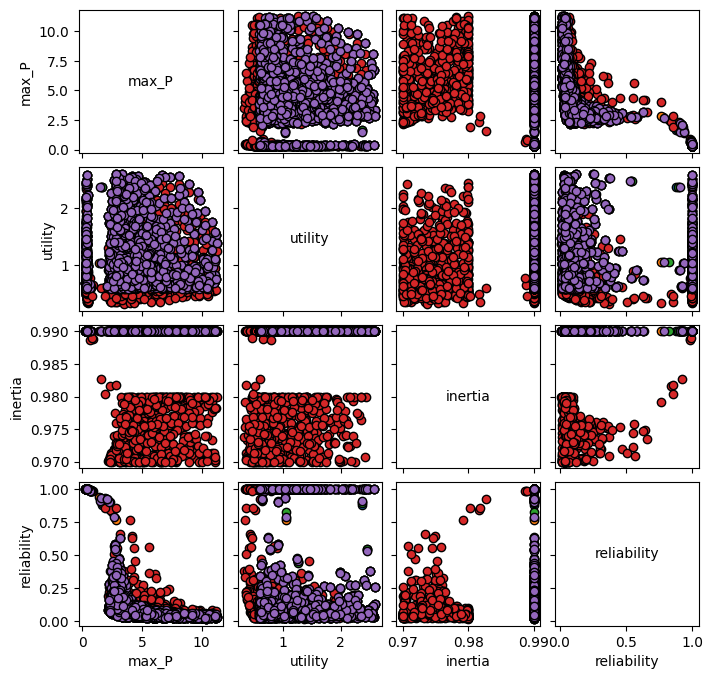

In [4]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by="policy", legend=False)
fig.set_size_inches(8, 8)
plt.show()

5000

In [14]:
from ema_workbench.analysis import prim

boxArr = []

x = experiments
y = outcomes["max_P"] < 0.8
#y = outcomes["max_P"]

y

array([False, False, False, ..., False, False,  True])

In [15]:
x

,b,delta,mean,q,stdev,c1,c2,r1,r2,w1,scenario,policy,model
0,0.102516,0.970385,0.028786,3.064633,0.004439,1.711834,1.746327,1.644945,1.289526,0.306905,5,0,lakeproblem
1,0.252497,0.972462,0.011223,2.262473,0.001552,1.711834,1.746327,1.644945,1.289526,0.306905,6,0,lakeproblem
2,0.189134,0.940739,0.032770,2.994989,0.003380,1.711834,1.746327,1.644945,1.289526,0.306905,7,0,lakeproblem
3,0.105293,0.949208,0.015703,2.148477,0.004634,1.711834,1.746327,1.644945,1.289526,0.306905,8,0,lakeproblem
4,0.210301,0.947296,0.047301,3.432014,0.004179,1.711834,1.746327,1.644945,1.289526,0.306905,9,0,lakeproblem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.109259,0.931980,0.014501,4.224583,0.001842,-1.732857,-0.893348,1.357879,0.419287,0.185507,1000,4,lakeproblem
4996,0.348070,0.969510,0.029543,3.112201,0.002830,-1.732857,-0.893348,1.357879,0.419287,0.185507,1001,4,lakeproblem
4997,0.321662,0.953748,0.034398,3.496119,0.003073,-1.732857,-0.893348,1.357879,0.419287,0.185507,1002,4,lakeproblem
4998,0.276635,0.968688,0.030153,3.051787,0.003811,-1.732857,-0.893348,1.357879,0.419287,0.185507,1003,4,lakeproblem


In [16]:
prim_alg = prim.Prim(x, y, threshold=0.8, threshold_type=1)
box1 = prim_alg.find_box()

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 5000 points remaining, containing 510 cases of interest
[MainProcess/INFO] mean: 0.958904109589041, mass: 0.073, coverage: 0.6862745098039216, density: 0.958904109589041 restricted_dimensions: 4


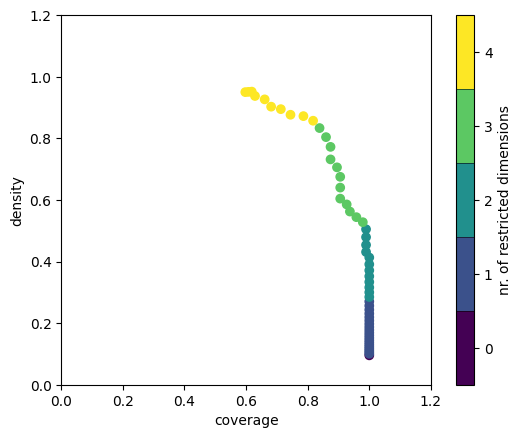

In [7]:
box1.show_tradeoff()
plt.show()

coverage    0.514925
density     0.811765
id                43
mass           0.102
mean        0.811765
res_dim            2
Name: 43, dtype: object

     box 43                                           
        min       max                        qp values
b  0.376130  0.449936  [2.4211807689951695e-136, -1.0]
q  3.281557  4.499339    [2.510853497683118e-56, -1.0]



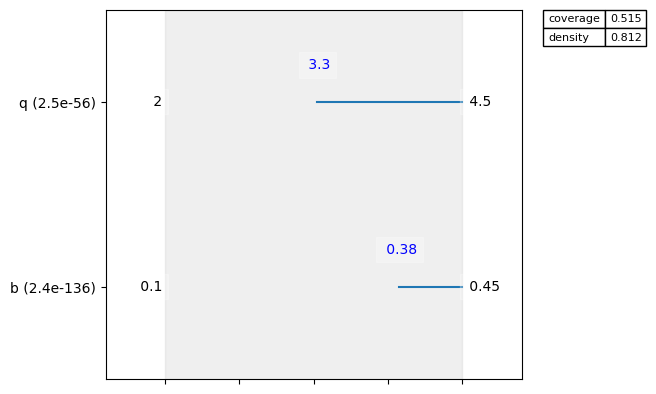

In [11]:
box1.inspect(43)
box1.inspect(43, style="graph")
plt.show()

In [31]:
box1.box_lims[5]

,b,delta,mean,q,stdev,c1,c2,r1,r2,w1,policy
0,0.150267,0.930037,0.010038,2.247290,0.001002,-1.204826,-1.906038,0.015703,0.195303,0.199209,"{0, 1, 2, 3, 4}"
1,0.449936,0.989979,0.049998,4.499339,0.004998,1.667419,1.210196,1.864853,1.673673,0.801362,"{0, 1, 2, 3, 4}"
